In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.datasets import make_blobs

def generate_cluster_data(n_samples=200, n_features=2, n_clusters=3, cluster_std=2.75, random_state=None):
    """
    Генерирует синтетические данные для кластеризации.

    Параметры:
    - n_samples: int, количество образцов в данных.
    - n_features: int, количество признаков для каждого образца.
    - n_clusters: int, количество кластеров.
    - cluster_std: float, стандартное отклонение кластеров.
    - random_state: int or None, seed для воспроизводимости.

    Возвращает:
    - features: массив формы (n_samples, n_features), сгенерированные признаки.
    - true_labels: массив формы (n_samples,), истинные метки кластеров.
    """
    features, true_labels = make_blobs(
        n_samples=n_samples,
        n_features=n_features,
        centers=n_clusters,
        cluster_std=cluster_std,
        random_state=random_state
    )
    return features, true_labels


In [54]:
features, true_labels = generate_cluster_data(n_samples=200, n_features=3, n_clusters=3, cluster_std=2.75, random_state=42)

In [3]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [36]:
features[:5]

array([[-5.87209985, 10.48921022,  2.12447878],
       [-6.18773938, 10.0008059 ,  5.83353437],
       [ 1.67444086, -7.03221083, -6.16678899],
       [ 7.60351672, -6.56375815, -2.61413674],
       [-6.384198  ,  7.58647914, -0.41094361]])

In [37]:
true_labels[:5]

array([0, 2, 1, 1, 2])

In [38]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [39]:
scaled_features[:5]

array([[-0.52332154,  0.94855745,  0.35433447],
       [-0.58370309,  0.88299445,  1.00969555],
       [ 0.92032467, -1.40350388, -1.11066764],
       [ 2.05455136, -1.34061917, -0.4829418 ],
       [-0.62128544,  0.55889719, -0.09365482]])

In [40]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [41]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [42]:
# The lowest SSE value
kmeans.inertia_

124.40116294581132

In [43]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.01023847, -1.29665443, -1.17446826],
       [-1.17460433,  0.47024562,  0.2561802 ],
       [ 0.03822304,  0.80357685,  0.86737755]])

In [44]:
# The number of iterations required to converge
kmeans.n_iter_

9

In [45]:
kmeans.labels_[:5]

array([2, 2, 0, 0, 1])

In [46]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

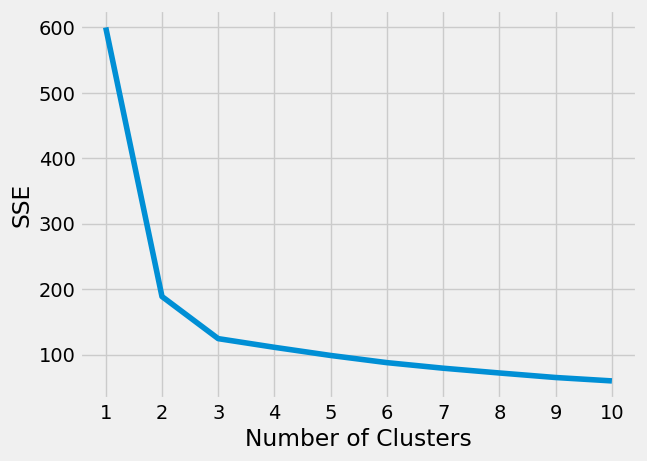

In [47]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [48]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [49]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

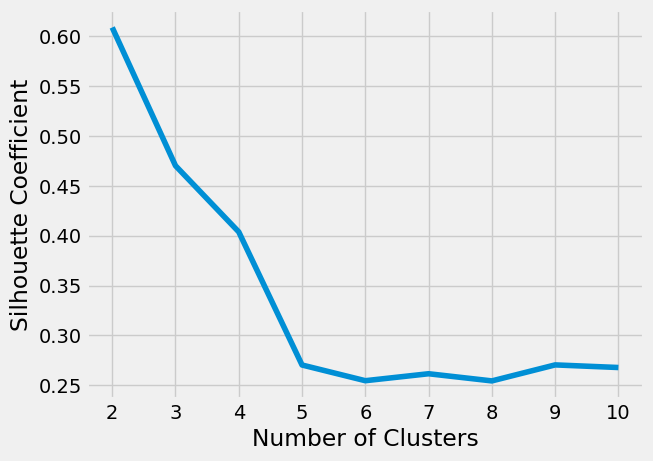

In [50]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [52]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [55]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

C:\Users\Admin\PycharmProjects\machine_learning_mirea\MIREA\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
kmeans_silhouette

0.5

In [57]:
dbscan_silhouette

0.38

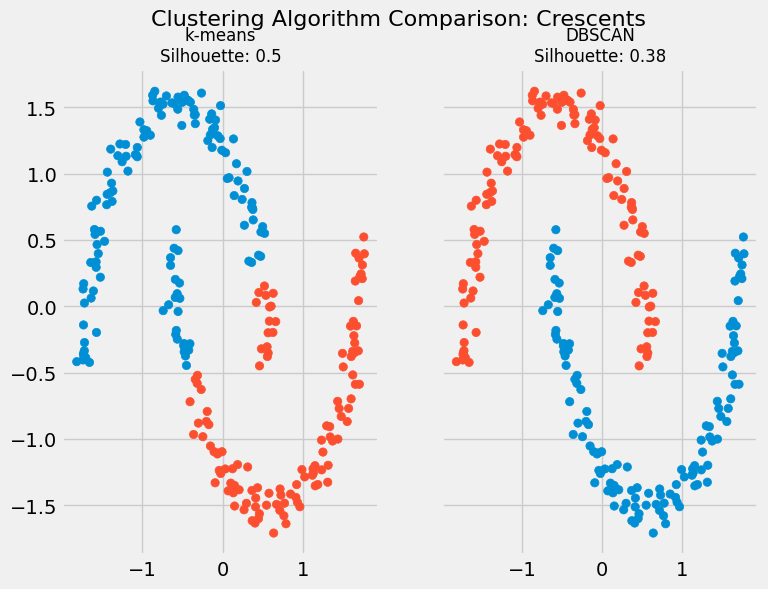

In [58]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

In [59]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

print(round(ari_kmeans, 2))
print(round(ari_dbscan, 2))

ValueError: Found input variables with inconsistent numbers of samples: [200, 250]

74.57960106819854
[[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]]
10


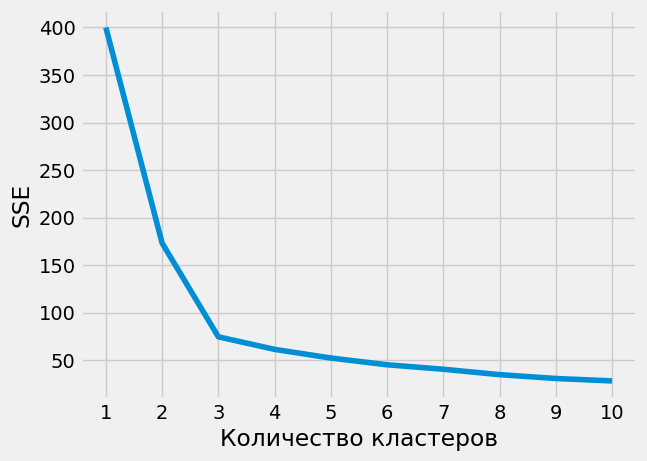

3


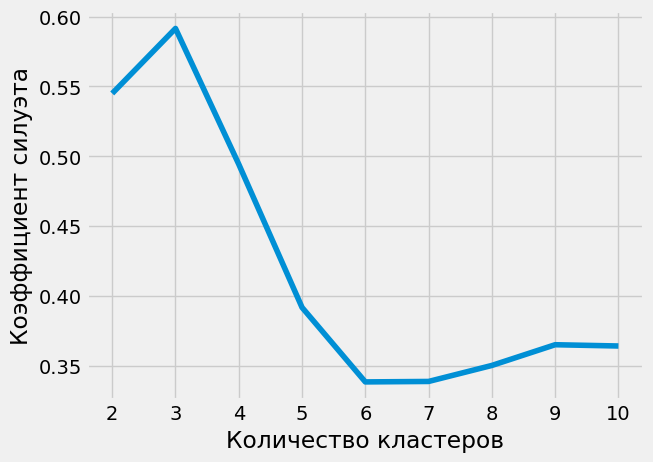

0.59


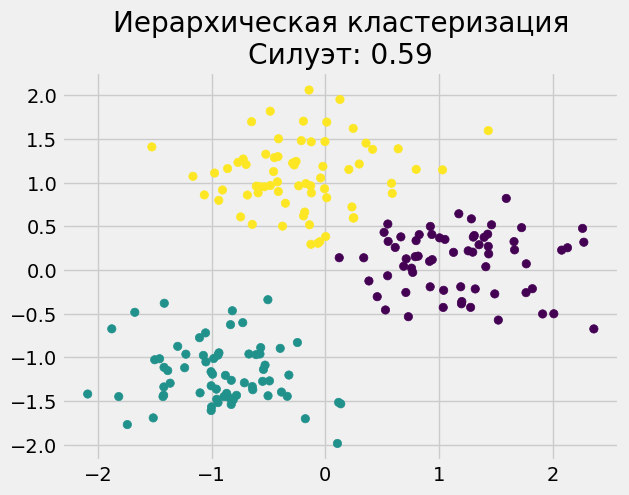

In [31]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Вывод наименьшего значения SSE
print(kmeans.inertia_)
# Финальные координаты центроидов
print(kmeans.cluster_centers_)
# Количество итераций, необходимых для сходимости
print(kmeans.n_iter_)

# Расчет SSE для разного числа кластеров
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Визуализация Elbow-метода
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Количество кластеров")
plt.ylabel("SSE")
plt.show()

# Определение оптимального числа кластеров с использованием KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

print(kl.elbow)

# Расчет коэффициента силуэта для разного числа кластеров
silhouette_coefficients = []

# Начиная с 2 кластеров для коэффициента силуэта
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

# Визуализация коэффициента силуэта
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Количество кластеров")
plt.ylabel("Коэффициент силуэта")
plt.show()

# Иерархическая кластеризация
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(scaled_features)

# Расчет коэффициента силуэта для иерархической кластеризации
agglomerative_silhouette = silhouette_score(
    scaled_features, agglomerative.labels_
).round(2)

print(agglomerative_silhouette)

# Визуализация результатов иерархической кластеризации
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=agglomerative.labels_)
plt.title(f"Иерархическая кластеризация\nСилуэт: {agglomerative_silhouette}")
plt.show()


0.59


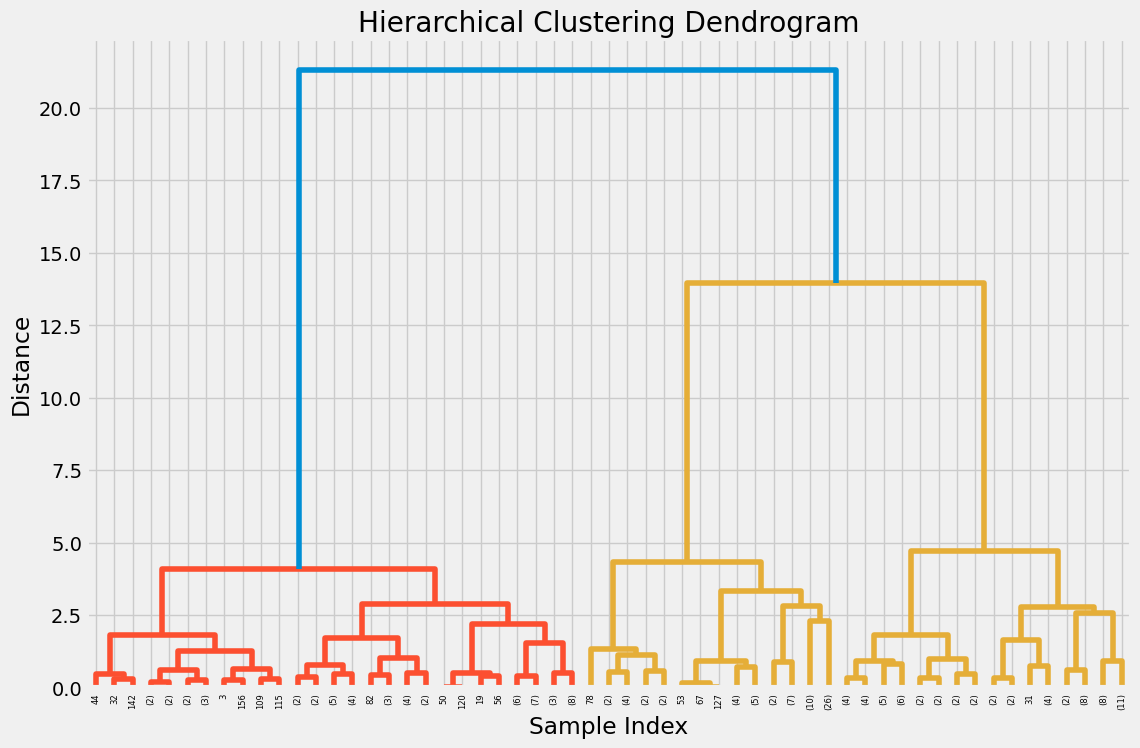

In [32]:
# Иерархическая кластеризация
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(scaled_features)

# Расчет коэффициента силуэта для иерархической кластеризации
agglomerative_silhouette = silhouette_score(
    scaled_features, agglomerative.labels_
).round(2)

print(agglomerative_silhouette)

# Построение дендрограммы
from scipy.cluster.hierarchy import dendrogram, linkage

# Создание матрицы linkage
linkage_matrix = linkage(scaled_features, 'ward')

# Построение дендрограммы
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, p=5, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
